Regresia Polinomială, Logistică, Naive Bayes și Regresie Liniară


In [1]:

# Librării
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings('ignore')
print('Libraries loaded')

Libraries loaded


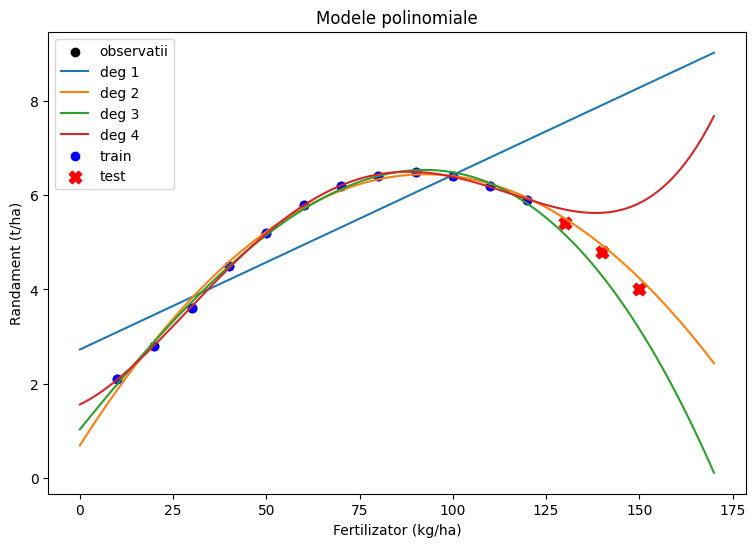

{1: {'MAE_test': 3.17972027972028,
     'MAE_train': 0.6333333333333333,
     'MSE_test': 10.877008112322793,
     'MSE_train': 0.511942501942502,
     'R2_test': -32.07198412530577,
     'R2_train': 0.7617640890650198,
     'RMSE_test': np.float64(3.298030944718802),
     'RMSE_train': np.float64(0.7155015736827572),
     'opt_amount': 170.0,
     'opt_value': 9.024941724941725},
 2: {'MAE_test': 0.16323676323676098,
     'MAE_train': 0.08771228771228771,
     'MSE_test': 0.02971612470113902,
     'MSE_train': 0.012174492174492174,
     'R2_test': 0.9096469181384287,
     'R2_train': 0.9943345176023562,
     'RMSE_test': np.float64(0.1723836555510383),
     'RMSE_train': np.float64(0.11033808125254026),
     'opt_amount': 92.66533066132264,
     'opt_value': 6.44445069751474},
 3: {'MAE_test': 0.5267399267398601,
     'MAE_train': 0.0687590187590249,
     'MSE_test': 0.33922181714382144,
     'MSE_train': 0.006207126207126215,
     'R2_test': -0.03141768726161853,
     'R2_train': 0.9

In [2]:

# ---------------------------
# Regresie polinomială (fermier)
# ---------------------------
X = np.array([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]).reshape(-1,1)
y = np.array([2.1,2.8,3.6,4.5,5.2,5.8,6.2,6.4,6.5,6.4,6.2,5.9,5.4,4.8,4.0])

# Train = primele 12, Test = ultimele 3
X_train, X_test = X[:12], X[12:15]
y_train, y_test = y[:12], y[12:15]

plt.figure(figsize=(9,6))
plt.scatter(X, y, color='black', label='observatii')
xs = np.linspace(0,170,500).reshape(-1,1)

results = {}
for deg in [1,2,3,4]:
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    Xtr = poly.fit_transform(X_train)
    Xte = poly.transform(X_test)
    Xs = poly.transform(xs)
    model = LinearRegression().fit(Xtr, y_train)
    ytr_pred = model.predict(Xtr)
    yte_pred = model.predict(Xte)
    yxs = model.predict(Xs)
    results[deg] = {
        'MAE_train': mean_absolute_error(y_train, ytr_pred),
        'MSE_train': mean_squared_error(y_train, ytr_pred),
        'RMSE_train': np.sqrt(mean_squared_error(y_train, ytr_pred)),
        'R2_train': r2_score(y_train, ytr_pred),
        'MAE_test': mean_absolute_error(y_test, yte_pred),
        'MSE_test': mean_squared_error(y_test, yte_pred),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, yte_pred)),
        'R2_test': r2_score(y_test, yte_pred),
        'opt_amount': float(xs[np.argmax(yxs)]),
        'opt_value': float(np.max(yxs))
    }
    plt.plot(xs, yxs, label=f'deg {deg}')

plt.scatter(X_train, y_train, label='train', c='blue')
plt.scatter(X_test, y_test, label='test', c='red', marker='X', s=80)
plt.xlabel('Fertilizator (kg/ha)'); plt.ylabel('Randament (t/ha)')
plt.legend(); plt.title('Modele polinomiale')
plt.show()

import pprint; pprint.pprint(results)

--- Metrics for train ---
Accuracy: 0.9285714285714286
Precision: 0.875
Recall: 1.0
F1: 0.9333333333333333
ROC AUC: 0.979591836734694
Confusion matrix:
 [[6 1]
 [0 7]]

--- Metrics for test ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC AUC: nan
Confusion matrix:
 [[4]]



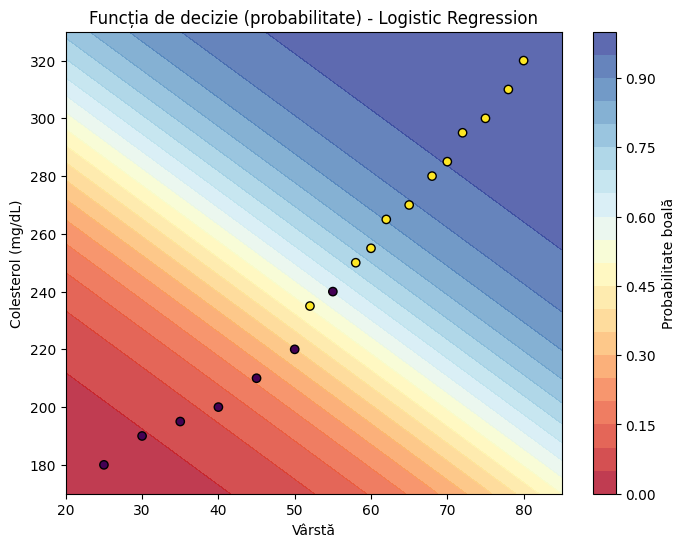

Probabilitatea prezisă de boală pentru (55 ani, colesterol 260) = 0.7513

Coeficienți (logit):
  age: 0.9317 (impact asupra log-odds, semn -> direcție)
  cholesterol: 1.1794 (impact asupra log-odds, semn -> direcție)


In [7]:

# ---------------------------
# Regresie logistica (boala cardiaca)
# ---------------------------
age = np.array([25,30,35,40,45,50,52,55,58,60,62,65,68,70,72,75,78,80])
chol = np.array([180,190,195,200,210,220,235,240,250,255,265,270,280,285,295,300,310,320])
y_card = np.array([0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1])

X = np.vstack([age, chol]).T
X_train, X_test = X[:14], X[14:18]
y_train, y_test = y_card[:14], y_card[14:18]

scaler = StandardScaler().fit(X_train)
Xtr_s = scaler.transform(X_train)
Xte_s = scaler.transform(X_test)

clf = LogisticRegression(solver='liblinear').fit(Xtr_s, y_train)
ytr_pred = clf.predict(Xtr_s); yte_pred = clf.predict(Xte_s)
ytr_prob = clf.predict_proba(Xtr_s)[:,1]; yte_prob = clf.predict_proba(Xte_s)[:,1]

def print_log_metrics(y_true, y_pred, y_prob, name='set'):
    print(f'--- Metrics for {name} ---')
    print('Accuracy:', accuracy_score(y_true, y_pred))
    print('Precision:', precision_score(y_true, y_pred, zero_division=0))
    print('Recall:', recall_score(y_true, y_pred, zero_division=0))
    print('F1:', f1_score(y_true, y_pred, zero_division=0))
    try:
        print('ROC AUC:', roc_auc_score(y_true, y_prob))
    except:
        print('ROC AUC: N/A')
    print('Confusion matrix:\n', confusion_matrix(y_true, y_pred))
    print()

print_log_metrics(y_train, ytr_pred, ytr_prob, 'train')
print_log_metrics(y_test, yte_pred, yte_prob, 'test')

# Vizualizare funcție decizie (probabilitate) pe grid - 2D
xx, yy = np.meshgrid(np.linspace(age.min()-5, age.max()+5, 200),
                     np.linspace(chol.min()-10, chol.max()+10, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_s = scaler.transform(grid)
probs = clf.predict_proba(grid_s)[:,1].reshape(xx.shape)

plt.figure(figsize=(8,6))
cs = plt.contourf(xx, yy, probs, levels=20, cmap='RdYlBu', alpha=0.8)
plt.colorbar(cs, label='Probabilitate boală')
plt.scatter(X[:,0], X[:,1], c=y_card, edgecolor='k')
plt.xlabel('Vârstă')
plt.ylabel('Colesterol (mg/dL)')
plt.title('Funcția de decizie (probabilitate) - Logistic Regression')
plt.show()

# predictie pentru persoana de 55 ani si colesterol 260 mg/dL
sample = np.array([[55, 260]])
sample_s = scaler.transform(sample)
prob_sample = clf.predict_proba(sample_s)[:,1][0]
print(f'Probabilitatea prezisă de boală pentru (55 ani, colesterol 260) = {prob_sample:.4f}')

# importanța caracteristicilor: coeficienți
coef = clf.coef_[0]
feat_names = ['age','cholesterol']
print('\nCoeficienți (logit):')
for n,c in zip(feat_names, coef):
    print(f'  {n}: {c:.4f} (impact asupra log-odds, semn -> direcție)')

In [4]:

# ---------------------------
# Naive Bayes (spam) - corectat, calcule manuale pas cu pas
# ---------------------------
# Construim DataFrame din tabelul oferit (20 emailuri)
data = [
# Free, Money, Winner, Link, Spam
[1,1,1,1,1],
[1,1,0,1,1],
[0,0,0,0,0],
[1,0,1,1,1],
[0,0,0,1,0],
[1,1,1,1,1],
[0,1,0,1,1],
[0,0,0,0,0],
[1,1,1,0,1],
[0,0,1,0,0],
[1,0,0,1,1],
[0,0,0,0,0],
[1,1,1,1,1],
[0,1,1,1,1],
[0,0,0,1,0],
[1,1,0,1,1],
[0,0,0,0,0],
[1,0,1,1,1],
[0,0,1,0,1],
[0,0,0,0,0]
]
cols = ['Free','Money','Winner','Link','Spam']
df = pd.DataFrame(data, columns=cols)
df.index += 1  # make index 1..20
print('Dataset:\n', df.head(10))  # show first rows

# Split: first 16 train, last 4 test (as requested)
df_train = df.iloc[:16].copy()
df_test = df.iloc[16:20].copy()

X_train = df_train[['Free','Money','Winner','Link']].values
y_train = df_train['Spam'].values
X_test = df_test[['Free','Money','Winner','Link']].values
y_test = df_test['Spam'].values

# 2) Priori (train)
p_spam = y_train.mean()
p_not = 1 - p_spam
print('\nPriors from train: P(Spam)=%.3f, P(NotSpam)=%.3f' % (p_spam, p_not))

# 3) Prob conditionale (without Laplace)
def compute_conditional_probs(X, y):
    feats = ['Free','Money','Winner','Link']
    cond = {}
    for i,f in enumerate(feats):
        # P(feature=1 | class=1) and P(feature=1 | class=0)
        numerator_spam = np.sum(X[y==1, i]==1)
        denom_spam = np.sum(y==1)
        numerator_not = np.sum(X[y==0, i]==1)
        denom_not = np.sum(y==0)
        p1_spam = numerator_spam/denom_spam if denom_spam>0 else 0.0
        p1_not = numerator_not/denom_not if denom_not>0 else 0.0
        cond[f] = {'P(1|Spam)': p1_spam, 'P(1|NotSpam)': p1_not,
                   'count_spam_with_feat': int(numerator_spam), 'count_not_with_feat': int(numerator_not)}
    return cond

cond_probs = compute_conditional_probs(X_train, y_train)
print('\nConditional probabilities (no Laplace):')
for k,v in cond_probs.items():
    print(k, v)

# 4) Clasificare manuala a unui nou email: Free=1, Money=0, Winner=1, Link=1
new = np.array([1,0,1,1])
print('\nNew email features:', new)

def manual_nb(X_train, y_train, x, laplace=False, alpha=1.0):
    n_spam = np.sum(y_train==1)
    n_not = np.sum(y_train==0)
    total = len(y_train)
    p_spam = n_spam/total
    p_not = n_not/total
    feats = ['Free','Money','Winner','Link']
    # compute conditional probs with/without Laplace
    cond = {}
    for i,f in enumerate(feats):
        count_spam = np.sum(X_train[y_train==1,i]==1)
        count_not = np.sum(X_train[y_train==0,i]==1)
        if laplace:
            p_f_spam = (count_spam + alpha) / (n_spam + 2*alpha)
            p_f_not = (count_not + alpha) / (n_not + 2*alpha)
        else:
            p_f_spam = count_spam / n_spam if n_spam>0 else 0.0
            p_f_not = count_not / n_not if n_not>0 else 0.0
        cond[f] = (p_f_spam, p_f_not, int(count_spam), int(count_not))
    # compute likelihoods (use logs to avoid underflow)
    log_like_spam = np.log(p_spam) if p_spam>0 else -np.inf
    log_like_not = np.log(p_not) if p_not>0 else -np.inf
    for i,val in enumerate(x):
        p1_spam, p1_not, _, _ = cond[feats[i]]
        if val==1:
            log_like_spam += np.log(p1_spam) if p1_spam>0 else -np.inf
            log_like_not += np.log(p1_not) if p1_not>0 else -np.inf
        else:
            log_like_spam += np.log(1-p1_spam) if p1_spam<1 else -np.inf
            log_like_not += np.log(1-p1_not) if p1_not<1 else -np.inf
    maxlog = max(log_like_spam, log_like_not)
    if np.isinf(maxlog):
        return None, cond, (log_like_spam, log_like_not)
    exp_spam = np.exp(log_like_spam - maxlog)
    exp_not = np.exp(log_like_not - maxlog)
    prob_spam = exp_spam / (exp_spam + exp_not)
    return prob_spam, cond, (log_like_spam, log_like_not)

prob_no_lap, cond_no_lap, logs_no_lap = manual_nb(X_train, y_train, new, laplace=False)
print('\nManual NB without Laplace:')
print('P(Spam|x) ≈', prob_no_lap)
print('Log-likelihoods (spam, not):', logs_no_lap)
print('Conditional probs used (no Laplace):')
for k,v in cond_no_lap.items():
    print(k, 'P(1|Spam)=%.3f, P(1|Not)=%.3f, counts(spam,not)=(%d,%d)' % (v[0], v[1], v[2], v[3]))

# With Laplace smoothing alpha=1
prob_lap, cond_lap, logs_lap = manual_nb(X_train, y_train, new, laplace=True, alpha=1.0)
print('\nManual NB WITH Laplace (alpha=1):')
print('P(Spam|x) ≈', prob_lap)
print('Log-likelihoods (spam, not):', logs_lap)
print('Conditional probs used (Laplace):')
for k,v in cond_lap.items():
    print(k, 'P(1|Spam)=%.3f, P(1|Not)=%.3f, counts(spam,not)=(%d,%d)' % (v[0], v[1], v[2], v[3]))

# 5) Train BernoulliNB and compare
clf = BernoulliNB(alpha=1.0)
clf.fit(X_train, y_train)
print('\nBernoulliNB predict_proba for new email:', clf.predict_proba(new.reshape(1,-1))[0,1])
print('BernoulliNB class prediction for new email:', clf.predict(new.reshape(1,-1))[0])

# 6) Confusion matrices and metrics (train & test)
for name, (Xc, yc) in [('train',(X_train,y_train)), ('test',(X_test,y_test))]:
    pred = clf.predict(Xc)
    print('\n--- Metrics', name, '---')
    print('Confusion matrix:\n', confusion_matrix(yc, pred))
    print('Accuracy:', accuracy_score(yc, pred))
    print('Precision:', precision_score(yc, pred, zero_division=0))
    print('Recall:', recall_score(yc, pred, zero_division=0))
    print('F1:', f1_score(yc, pred, zero_division=0))

# 7) Feature importance: log probability differences
log_prob = clf.feature_log_prob_
feat_names = ['Free','Money','Winner','Link']
importance = {feat_names[i]: float(log_prob[1,i] - log_prob[0,i]) for i in range(len(feat_names))}
print('\nFeature importance (log-prob difference, higher -> more indicative of Spam):')
for k,v in sorted(importance.items(), key=lambda x:-x[1]):
    print(k, '%.4f' % v)

Dataset:
     Free  Money  Winner  Link  Spam
1      1      1       1     1     1
2      1      1       0     1     1
3      0      0       0     0     0
4      1      0       1     1     1
5      0      0       0     1     0
6      1      1       1     1     1
7      0      1       0     1     1
8      0      0       0     0     0
9      1      1       1     0     1
10     0      0       1     0     0

Priors from train: P(Spam)=0.625, P(NotSpam)=0.375

Conditional probabilities (no Laplace):
Free {'P(1|Spam)': np.float64(0.8), 'P(1|NotSpam)': np.float64(0.0), 'count_spam_with_feat': 8, 'count_not_with_feat': 0}
Money {'P(1|Spam)': np.float64(0.8), 'P(1|NotSpam)': np.float64(0.0), 'count_spam_with_feat': 8, 'count_not_with_feat': 0}
Winner {'P(1|Spam)': np.float64(0.6), 'P(1|NotSpam)': np.float64(0.16666666666666666), 'count_spam_with_feat': 6, 'count_not_with_feat': 1}
Link {'P(1|Spam)': np.float64(0.9), 'P(1|NotSpam)': np.float64(0.3333333333333333), 'count_spam_with_feat': 9, 'coun

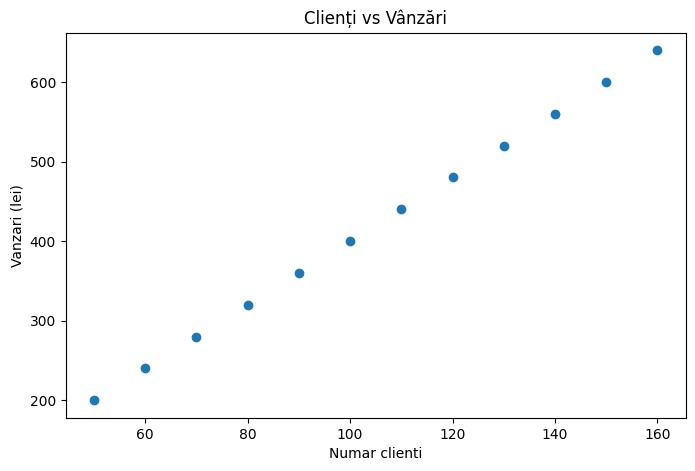

Coefficients: slope= 3.999999999999999  intercept= 1.1368683772161603e-13
MAE: 2.3684757858670007e-14
MSE: 1.3463226115771935e-27
RMSE: 3.669226909823367e-14
R2: 1.0

Predicted sales for 170 clients: 680.0

Interpretare: date strict liniare -> R2 aproape de 1. Model adecvat; predicția pentru 170 este o extindere mică (extrapolare modestă).


In [5]:

# ---------------------------
# Regresie liniara (cafenea)
# ---------------------------
X = np.array([50,60,70,80,90,100,110,120,130,140,150,160]).reshape(-1,1)
y = np.array([200,240,280,320,360,400,440,480,520,560,600,640])

plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.xlabel('Numar clienti'); plt.ylabel('Vanzari (lei)'); plt.title('Clienți vs Vânzări')
plt.show()

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
MAE = mean_absolute_error(y, y_pred)
MSE = mean_squared_error(y, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y, y_pred)

print('Coefficients: slope=', model.coef_[0], ' intercept=', model.intercept_)
print('MAE:', MAE); print('MSE:', MSE); print('RMSE:', RMSE); print('R2:', R2)

# Predict for 170 clients
pred_170 = model.predict(np.array([[170]]))[0]
print('\nPredicted sales for 170 clients:', pred_170)
print('\nInterpretare: date strict liniare -> R2 aproape de 1. Model adecvat; predicția pentru 170 este o extindere mică (extrapolare modestă).')